In [2]:
# 파이썬 확장 라이브러리
import re
from collections import defaultdict

# 데이터 프레임 처리 라이브러리
import pandas as pd

# 수치 계산 라이브러리
import numpy as np

# 시각화 라이브러리
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 군집 전처리 라이브러리
from sklearn.preprocessing import StandardScaler

# 군집 모델 라이브러리
from sklearn.cluster import KMeans

# 군집 평가 지표 라이브러리
from sklearn.metrics import silhouette_score

In [5]:
df1 = pd.read_csv("../01_data/02_processed/production/X_train_nonlinear.csv")
df2 = pd.read_csv("../01_data/02_processed/production/X_test_nonlinear.csv")
df3 = pd.read_csv("../01_data/02_processed/production/y_train.csv")
df4 = pd.read_csv("../01_data/02_processed/production/y_test.csv")

In [6]:
df5 = pd.concat([df1, df2], axis=0, ignore_index=True)
df5.head(50000)

,Agent_Age,Agent_Rating,Distance,Pickup_Wait_Time,Vehicle_scooter,Vehicle_van,Area_Metropolitian,Area_Other,Area_Semi_Urban,Category_Apparel,...,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys,Traffic_score,Weather_score
0,39,5.0,3.064486,5.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,1,1
1,38,4.1,4.538408,10.0,True,False,True,False,False,False,...,False,False,False,False,False,True,False,False,2,5
2,26,4.9,17.297866,10.0,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,1,1
3,20,4.8,13.611172,5.0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,1,5
4,29,4.7,10.707345,5.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43438,29,4.7,6.242483,5.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,2,5
43439,23,4.9,14.045606,10.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,4,1
43440,34,4.5,19.975287,15.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,4,2
43441,28,4.9,3.020360,5.0,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,3,3


In [7]:
df6 = pd.concat([df3, df4], axis=0, ignore_index=True )
df6.head(50000)

,Delivery_Time
0,70
1,160
2,135
3,80
4,100
...,...
43438,130
43439,145
43440,220
43441,130


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df5)

X_scaled[:5]

array([[ 1.63914391e+00,  1.16199909e+00, -1.18980563e+00,
        -1.22150212e+00,  1.40953879e+00, -2.96198910e-01,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -2.57935695e-01, -2.62524004e-01, -2.55337299e-01,
        -2.64123347e-01, -2.56307647e-01, -2.55592923e-01,
        -2.61721616e-01, -2.55081481e-01, -2.59101105e-01,
        -2.55899417e-01,  3.92978687e+00, -2.60363422e-01,
        -2.60060883e-01, -2.57173512e-01, -2.60514593e-01,
        -1.11088291e+00, -1.47989009e+00],
       [ 1.46558454e+00, -1.70560849e+00, -9.26825034e-01,
         1.99959999e-03,  1.40953879e+00, -2.96198910e-01,
         5.80867678e-01, -1.63567332e-01, -5.92547247e-02,
        -2.57935695e-01, -2.62524004e-01, -2.55337299e-01,
        -2.64123347e-01, -2.56307647e-01, -2.55592923e-01,
        -2.61721616e-01, -2.55081481e-01, -2.59101105e-01,
        -2.55899417e-01, -2.54466726e-01, -2.60363422e-01,
         3.84525342e+00, -2.57173512e-01, -2.60514593e-01,
        -3.08

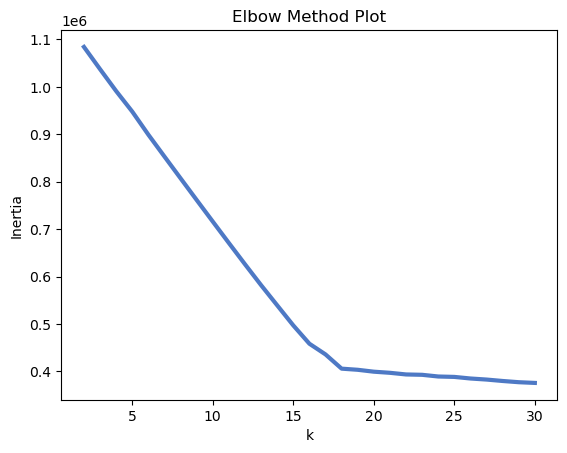

In [11]:
inertia = []

for k in range(2,31):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2,31), inertia, color = "#4E79C5", linewidth = 3)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method Plot")
plt.savefig("../04_results/k_means/fig1.png", dpi = 300, bbox_inches = "tight")
plt.show()

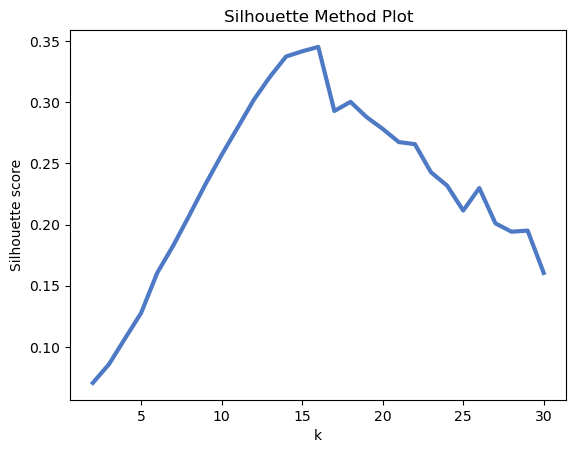

In [12]:
scores = []

for k in range(2,31):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

plt.plot(range(2,31), scores, color = "#4E79C5", linewidth = 3)
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette Method Plot")
plt.savefig("../04_results/k_means/fig2.png", dpi = 300, bbox_inches = "tight")
plt.show()

In [6]:
def kmeans_sorted_labels(X_scaled, delivery_series, k):
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    temp = pd.DataFrame({
        "Cluster": labels,
        "Delivery_Time": delivery_series.values
    })
    
    # 1) 클러스터별 mean 계산
    order = (
        temp.groupby("Cluster")["Delivery_Time"]
        .mean()
        .sort_values()        # 빠른 → 느린 순
        .index
    )
    
    # 2) 기존 label → 새 label 매핑
    mapping = {old:new for new, old in enumerate(order)}
    
    # 3) 라벨 재정렬
    sorted_labels = pd.Series(labels).map(mapping).values
    
    return sorted_labels

In [7]:
labels_1 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 1)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_1
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,43443,124.935341,125.0,51.955059


In [8]:
labels_2 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 2)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_2
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,12961,114.578505,110.0,50.476566
1,30482,129.339085,130.0,51.950018


In [9]:
labels_3 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 3)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_3
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,38119,123.967601,125.0,52.557809
1,2670,131.359551,130.0,46.673996
2,2654,132.371891,130.0,47.010092


In [10]:
labels_6 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 6)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_6
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,2678,26.540702,26.0,9.507150
1,2785,130.827648,125.0,46.972905
2,2642,131.177139,130.0,46.363352
3,2670,131.359551,130.0,46.673996
4,29973,131.387249,125.0,47.013795
5,2695,132.380334,130.0,45.213365


In [11]:
labels_7 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 7)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_7
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,2678,26.540702,26.0,9.507150
1,2785,130.827648,125.0,46.972905
2,2833,130.885987,125.0,45.294377
3,2801,131.108533,125.0,47.003735
4,26997,131.348668,125.0,47.095064
5,2654,132.371891,130.0,47.010092
6,2695,132.380334,130.0,45.213365


In [12]:
labels_16 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 16)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_16
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,2670,26.477903,26.0,9.450789
1,2748,128.815502,125.0,46.601735
2,5410,130.156192,125.0,46.605703
3,2822,130.423459,125.0,44.765405
4,2658,130.752445,125.0,47.246919
5,2794,130.816034,125.0,46.692193
6,2728,130.901760,125.0,46.450591
7,2636,130.925645,130.0,46.110754
8,2665,131.155722,130.0,46.478023


In [13]:
labels_17 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 17)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_17
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,2670,26.477903,26.0,9.450789
1,2748,128.815502,125.0,46.601735
2,2639,130.081470,125.0,46.915299
3,2771,130.227355,125.0,46.317289
4,2822,130.423459,125.0,44.765405
5,2658,130.752445,125.0,47.246919
6,2794,130.816034,125.0,46.692193
7,2728,130.901760,125.0,46.450591
8,2636,130.925645,130.0,46.110754


In [14]:
labels_18 = kmeans_sorted_labels(X_scaled, df6["Delivery_Time"], 18)

df_cluster = df5.copy()
df_cluster["Cluster"] = labels_18
df_cluster["Delivery_Time"] = df6.values

df_cluster.groupby("Cluster")["Delivery_Time"].agg(["count","mean","median","std"])

,count,mean,median,std
Cluster,,,,
0,2595,26.595376,26.0,9.453639
1,1132,104.532686,100.0,46.025536
2,2666,129.328582,125.0,46.720791
3,2571,130.478413,125.0,46.966589
4,2695,131.159555,130.0,46.210524
5,2753,131.180530,125.0,44.745986
6,2591,131.240834,125.0,47.252447
7,2583,131.267906,130.0,46.232676
8,2669,131.330086,125.0,46.399923


In [24]:
ks = [2,3,6,7,16,17,18]

labels_dict = {
    2: labels_2,
    3: labels_3,
    6: labels_6,
    7: labels_7,
    16: labels_16,
    17: labels_17,
    18: labels_18,
}

flow_rows = []

# 🔥 존재하는 k끼리만 연결 (핵심)
for k_a, k_b in zip(ks[:-1], ks[1:]):
    lab_a = labels_dict[k_a]
    lab_b = labels_dict[k_b]

    for a, b in zip(lab_a, lab_b):
        flow_rows.append((f"k{k_a}_c{a}", f"k{k_b}_c{b}"))

flow_df = pd.DataFrame(flow_rows, columns=["source","target"])
flow_df = flow_df.value_counts().reset_index(name="value")

nodes = sorted(set(flow_df.source) | set(flow_df.target))
idx = {n:i for i,n in enumerate(nodes)}

flow_df.head()

,source,target,value
0,k3_c0,k6_c4,27319
1,k2_c1,k3_c0,26459
2,k6_c4,k7_c4,21685
3,k2_c0,k3_c0,11660
4,k6_c4,k7_c2,2833


In [25]:
BLUE_ROOT = "k6_c0"
RED_ROOT  = "k16_c15"

def get_descendants(root):
    desc = set([root])
    changed = True
    while changed:
        changed = False
        for s,t in zip(flow_df.source, flow_df.target):
            if s in desc and t not in desc:
                desc.add(t)
                changed = True
    return desc

def get_parents(root):
    return set(flow_df.loc[flow_df.target==root,"source"])

blue_desc = get_descendants(BLUE_ROOT)
red_desc  = get_descendants(RED_ROOT)

blue_par = get_parents(BLUE_ROOT)
red_par  = get_parents(RED_ROOT)

In [26]:
def link_color(s,t):

    # 🔴 RED 우선
    if (t==RED_ROOT and s in red_par) or (s in red_desc and t in red_desc):
        return "rgba(218,34,34,0.45)"

    # 🔵 그 다음 BLUE
    if (t==BLUE_ROOT and s in blue_par) or (s in blue_desc and t in blue_desc):
        return "rgba(78,121,197,0.45)"

    return "rgba(180,180,180,0.18)"
    
link_colors = [link_color(s,t) for s,t in zip(flow_df.source, flow_df.target)]

In [27]:
node_colors = []

for n in nodes:

    # 🔴 RED 먼저 검사
    if n in red_desc and n not in red_par:
        node_colors.append("#DA2222")

    # 🔵 그 다음 BLUE
    elif n in blue_desc and n not in blue_par:
        node_colors.append("#4E79C5")

    else:
        node_colors.append("#BBBBBB")

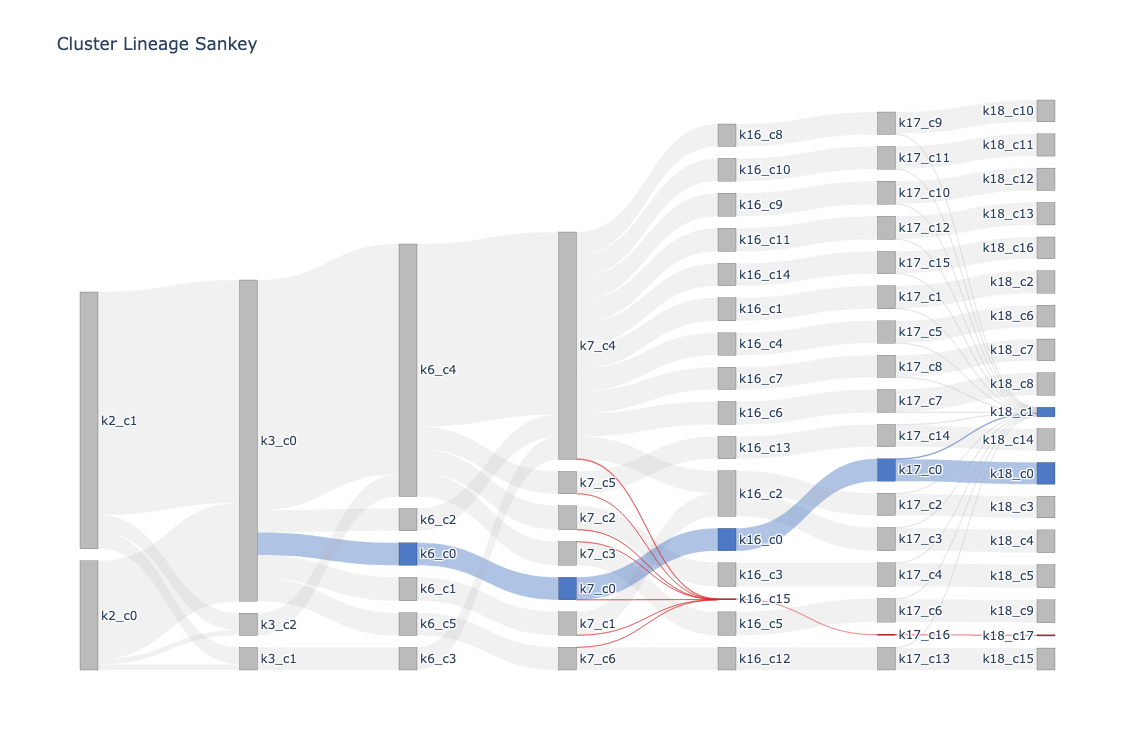

In [28]:
fig = go.Figure(go.Sankey(
    arrangement="snap",   # 🔥 자동 레이아웃 사용
    node=dict(
        label=nodes,
        color=node_colors,
        pad=12,
        thickness=18,
        line=dict(color="black", width=0.2),
    ),
    link=dict(
        source=[idx[s] for s in flow_df.source],
        target=[idx[t] for t in flow_df.target],
        value=flow_df.value,
        color=link_colors
    )
))

fig.update_layout(height=750, title="Cluster Lineage Sankey")
fig.show()

In [56]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[0].sort_values(ascending=False)

Category_Grocery         0.938356
Pickup_Wait_Time         0.073519
Traffic_score            0.031870
Agent_Age                0.011498
Weather_score            0.007953
Area_Metropolitian       0.005832
Area_Other               0.001949
Vehicle_van              0.001120
Area_Semi_Urban         -0.000512
Agent_Rating            -0.004089
Vehicle_scooter         -0.005083
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Distance                -0.063670
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Name: 0, dtype: float64

In [57]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[1].sort_values(ascending=False)

Category_Jewelry         0.935893
Distance                 0.131331
Area_Semi_Urban          0.001528
Area_Other               0.001232
Vehicle_van             -0.000586
Vehicle_scooter         -0.004106
Agent_Rating            -0.004175
Weather_score           -0.006057
Area_Metropolitian      -0.008039
Traffic_score           -0.022533
Agent_Age               -0.036148
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Grocery        -0.061644
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Books          -0.064475
Category_Electronics    -0.065212
Pickup_Wait_Time        -0.094162
Name: 1, dtype: float64

In [58]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[2].sort_values(ascending=False)

Category_Shoes           0.939185
Agent_Age                0.127856
Agent_Rating             0.011742
Area_Metropolitian       0.009665
Vehicle_van              0.001099
Area_Semi_Urban         -0.001228
Vehicle_scooter         -0.002104
Area_Other              -0.005997
Pickup_Wait_Time        -0.020216
Traffic_score           -0.024158
Weather_score           -0.055693
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Grocery        -0.061644
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Distance                -0.084761
Name: 2, dtype: float64

In [59]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[3].sort_values(ascending=False)

Category_Pet Supplies    0.938540
Vehicle_scooter          0.020999
Traffic_score            0.020007
Area_Metropolitian       0.003970
Agent_Rating             0.002784
Area_Other               0.000535
Area_Semi_Urban         -0.001626
Vehicle_van             -0.005377
Agent_Age               -0.031372
Distance                -0.035660
Weather_score           -0.050029
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Grocery        -0.061644
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Pickup_Wait_Time        -0.147259
Name: 3, dtype: float64

In [60]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[4].sort_values(ascending=False)

Category_Electronics     2.930651e-02
Category_Books           2.897548e-02
Category_Toys            2.856170e-02
Category_Skincare        2.853066e-02
Category_Snacks          2.846859e-02
Category_Outdoors        2.827204e-02
Category_Apparel         2.803412e-02
Category_Home            2.755826e-02
Category_Cosmetics       2.750654e-02
Category_Kitchen         2.745481e-02
Pickup_Wait_Time         2.235106e-02
Weather_score            5.530196e-03
Distance                 3.234446e-03
Vehicle_van              9.493663e-04
Area_Semi_Urban          1.044054e-04
Agent_Rating             7.247413e-05
Area_Other              -3.478950e-07
Vehicle_scooter         -1.439831e-03
Area_Metropolitian      -1.844113e-03
Agent_Age               -2.518808e-03
Traffic_score           -3.236393e-03
Category_Shoes          -6.081532e-02
Category_Pet Supplies   -6.145984e-02
Category_Grocery        -6.164399e-02
Category_Sports         -6.203531e-02
Category_Jewelry        -6.410699e-02
Name: 4, dty

In [61]:
df_analysis = df5.copy()
df_analysis["cluster_k6"] = labels_6

global_mean = df_analysis.drop(columns="cluster_k6").mean()

cluster_means = df_analysis.groupby("cluster_k6").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[5].sort_values(ascending=False)

Category_Sports          0.937965
Weather_score            0.041014
Traffic_score            0.031472
Distance                 0.010003
Area_Metropolitian       0.009613
Vehicle_scooter          0.006566
Area_Other               0.002143
Area_Semi_Urban          0.000583
Agent_Rating            -0.006697
Vehicle_van             -0.006817
Agent_Age               -0.040318
Pickup_Wait_Time        -0.058619
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Grocery        -0.061644
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Name: 5, dtype: float64

In [63]:
df_analysis = df5.copy()
df_analysis["cluster_k16"] = labels_16

global_mean = df_analysis.drop(columns="cluster_k16").mean()

cluster_means = df_analysis.groupby("cluster_k16").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[0].sort_values(ascending=False)

Category_Grocery         0.938356
Pickup_Wait_Time         0.071842
Traffic_score            0.028622
Agent_Age                0.015444
Area_Metropolitian       0.008090
Weather_score            0.006900
Area_Other               0.002033
Vehicle_van              0.001365
Area_Semi_Urban         -0.003499
Vehicle_scooter         -0.004095
Agent_Rating            -0.004669
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Distance                -0.079367
Name: 0, dtype: float64

In [64]:
df_analysis = df5.copy()
df_analysis["cluster_k16"] = labels_16

global_mean = df_analysis.drop(columns="cluster_k16").mean()

cluster_means = df_analysis.groupby("cluster_k16").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[1].sort_values(ascending=False)

Category_Toys            0.936445
Pickup_Wait_Time         0.057298
Area_Other               0.003783
Area_Metropolitian       0.003740
Vehicle_scooter          0.003621
Agent_Rating            -0.000008
Vehicle_van             -0.000599
Area_Semi_Urban         -0.003499
Traffic_score           -0.015481
Weather_score           -0.016664
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Grocery        -0.061644
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Jewelry        -0.064107
Category_Books          -0.064475
Category_Electronics    -0.065212
Distance                -0.146671
Agent_Age               -0.218744
Name: 1, dtype: float64

In [65]:
df_analysis = df5.copy()
df_analysis["cluster_k16"] = labels_16

global_mean = df_analysis.drop(columns="cluster_k16").mean()

cluster_means = df_analysis.groupby("cluster_k16").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[2].sort_values(ascending=False)

Category_Jewelry         0.448093
Distance                 0.029877
Vehicle_scooter          0.004010
Pickup_Wait_Time         0.003551
Agent_Rating             0.000831
Area_Other               0.000560
Vehicle_van              0.000489
Area_Metropolitian      -0.000211
Area_Semi_Urban         -0.003499
Weather_score           -0.022781
Traffic_score           -0.031063
Category_Shoes          -0.060815
Category_Kitchen        -0.061092
Category_Cosmetics      -0.061207
Category_Home           -0.061322
Category_Pet Supplies   -0.061460
Category_Grocery        -0.061644
Category_Sports         -0.062035
Category_Apparel        -0.062381
Category_Outdoors       -0.062910
Category_Snacks         -0.063347
Category_Skincare       -0.063485
Category_Toys           -0.063555
Category_Books          -0.064475
Category_Electronics    -0.065212
Agent_Age               -0.090467
Name: 2, dtype: float64

In [62]:
df_analysis = df5.copy()
df_analysis["cluster_k16"] = labels_16

global_mean = df_analysis.drop(columns="cluster_k16").mean()

cluster_means = df_analysis.groupby("cluster_k16").mean()

cluster_profile = cluster_means - global_mean

cluster_profile.loc[15].sort_values(ascending=False)

Distance                 3.142180
Agent_Age                3.010073
Traffic_score            1.379045
Area_Semi_Urban          0.996501
Pickup_Wait_Time         0.073961
Category_Skincare        0.028620
Category_Jewelry         0.027998
Category_Apparel         0.023146
Category_Toys            0.021972
Category_Sports          0.010333
Category_Snacks          0.009021
Category_Electronics     0.007157
Category_Kitchen         0.004698
Category_Cosmetics      -0.001996
Category_Grocery        -0.009012
Category_Books          -0.018423
Category_Shoes          -0.021342
Category_Home           -0.021848
Area_Other              -0.026057
Category_Pet Supplies   -0.028565
Category_Outdoors       -0.030015
Vehicle_van             -0.060921
Agent_Rating            -0.143201
Weather_score           -0.193204
Vehicle_scooter         -0.275596
Area_Metropolitian      -0.747715
Name: 15, dtype: float64